In [1]:
import math
import seabornautomation as sa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import seabornautomation as sa
pd.options.display.max_rows = 200
pd.options.display.min_rows = 200

In [2]:
data = pd.read_csv("BankChurners.csv")

## Data Cleaning on the Data

In [3]:
# I removed the first and the last two columns of the data Frame 

data.drop(labels=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
                ,axis=1, inplace=True)

In [4]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [5]:
data.describe(exclude=['object'])

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [6]:
data.describe(exclude=['float64','int64'])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [7]:
# This is to verify the number of null vlaues in my data set.
    # This shows that the data set is okay and read to be analyse
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

## Data Analysis and Visualization


In [8]:
# This to show the encod the object into integer
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

In [9]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

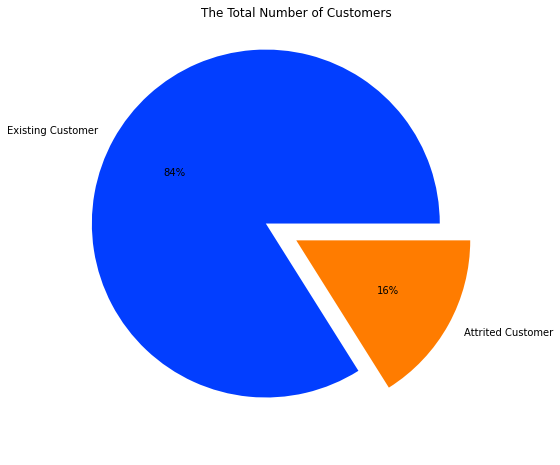

In [10]:
## This is a Pie chart of the Existing Customer and Atrrited Customer

att_count  = data['Attrition_Flag'].value_counts()
plt.figure(figsize=(12,8))
colors = sns.color_palette('bright')
plt.pie(att_count, labels=["Existing Customer","Attrited Customer"],colors = colors, autopct = '%0.0f%%',explode = [0.2, 0])

plt.title('The Total Number of Customers', fontsize=12)
plt.show()

In [11]:
object_col = [x for x in data.columns if data[x].dtype == 'O']
number_col = [x for x in data.columns if x not in object_col]


In [12]:
## The number_col is divided into three different categories and we group each categories of the num_col by object_col
num_col_1= [           
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct']

num_col_2 = [
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon']

num_col_3 = ['Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [13]:
## This function group the object_col by each categories of the number_col
def group_by(data, object_col, number_col, xlabel,ylabel):
    for i in object_col:
        res = data.groupby([i])[number_col].mean().T
        res.plot(kind="barh", figsize=(12,8))
        plt.title("Transaction History of all Customers" ,fontsize=(20))
        plt.ylabel(xlabel, fontsize=20)
        plt.xlabel(ylabel, fontsize=20)
    
    return plt.show()

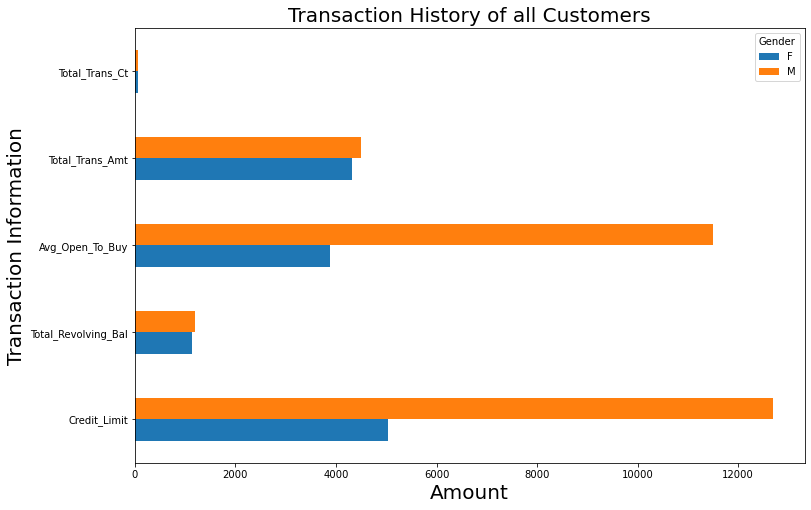

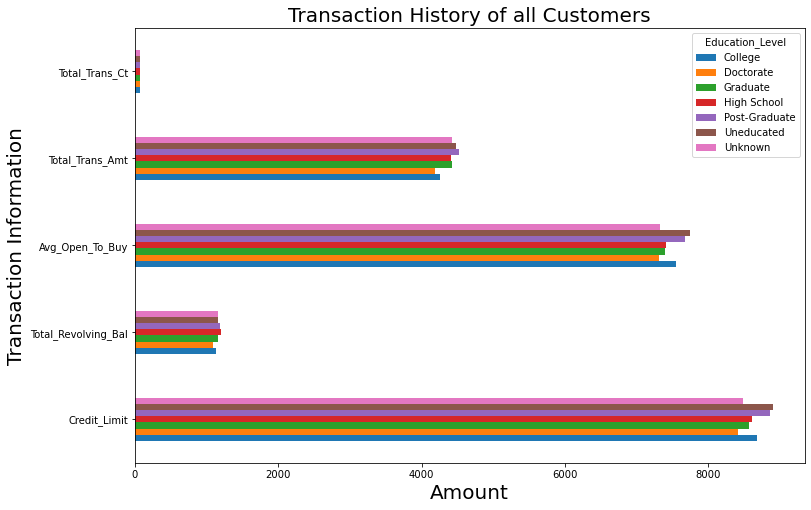

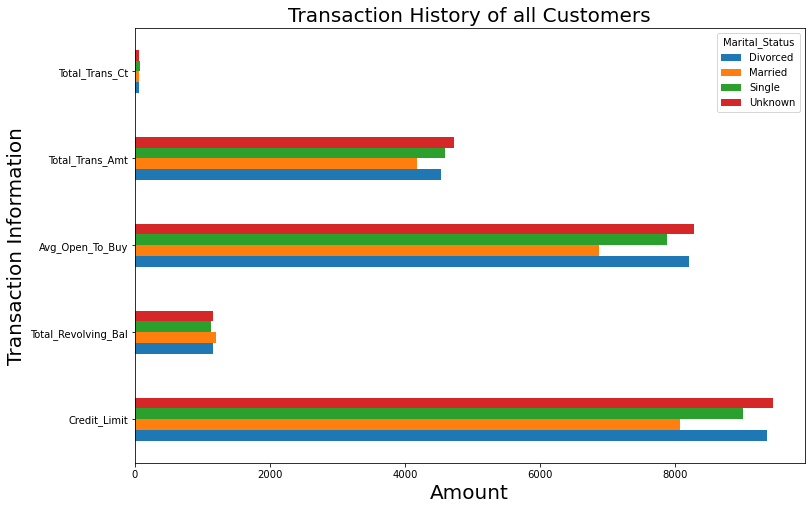

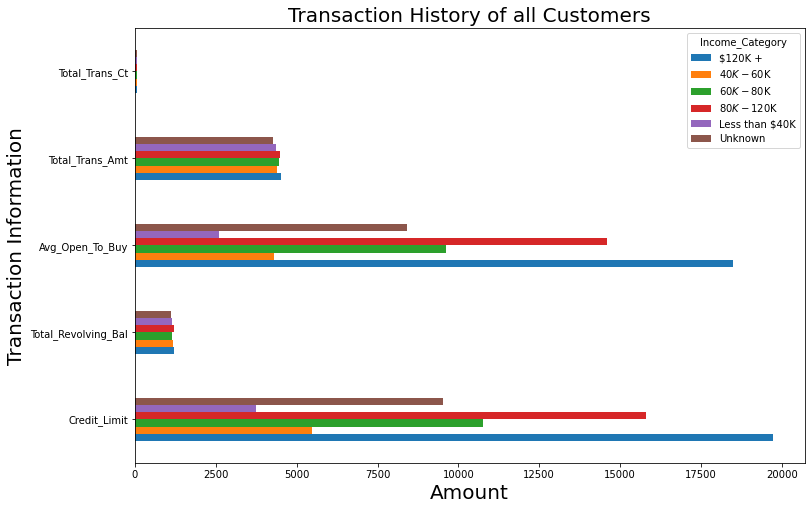

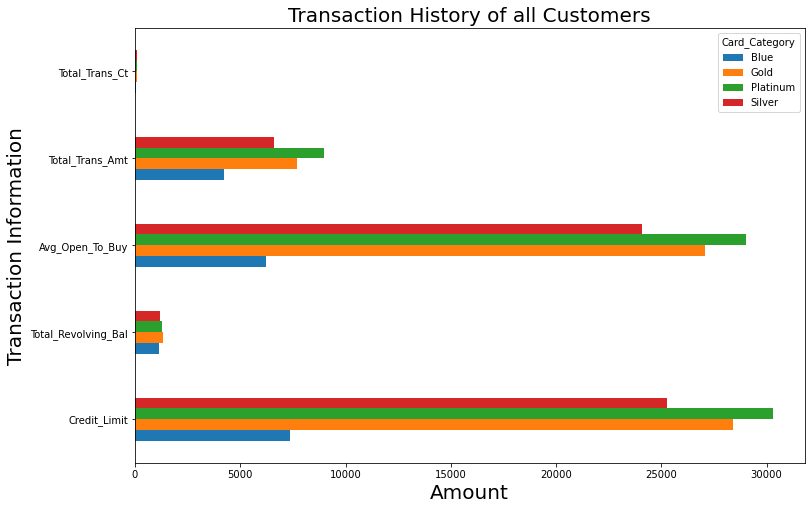

In [14]:
group_by(data, object_col, num_col_1, "Transaction Information", "Amount")

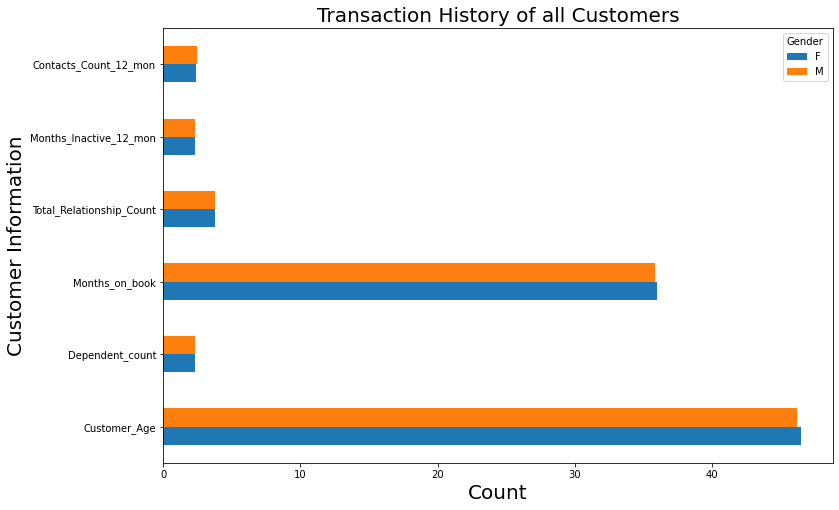

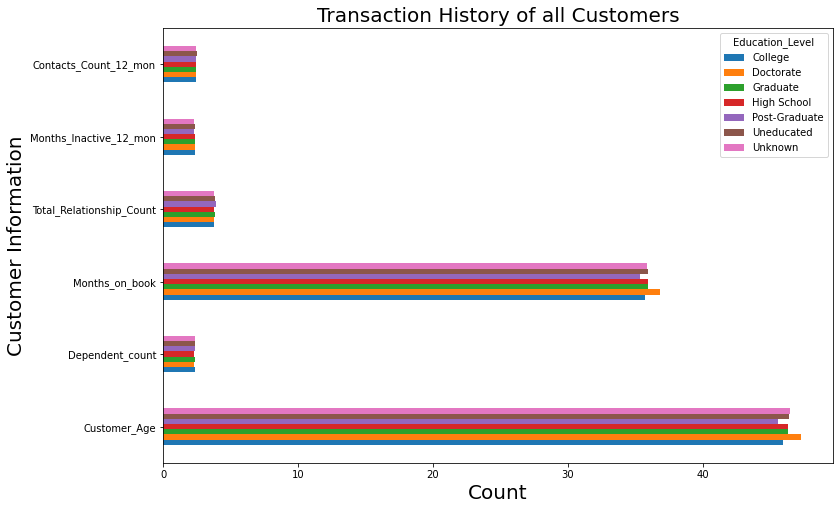

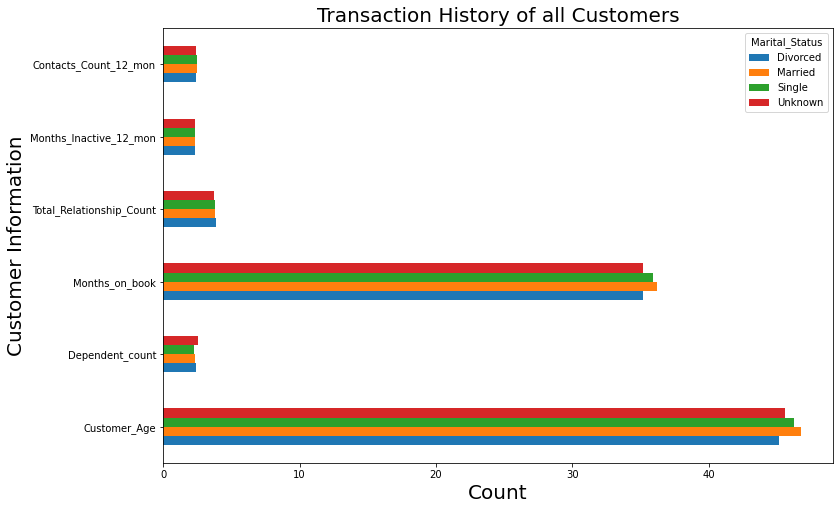

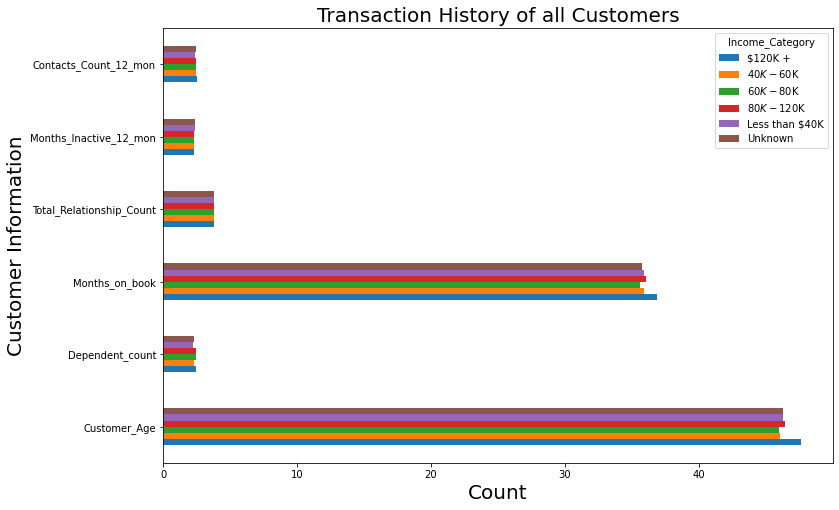

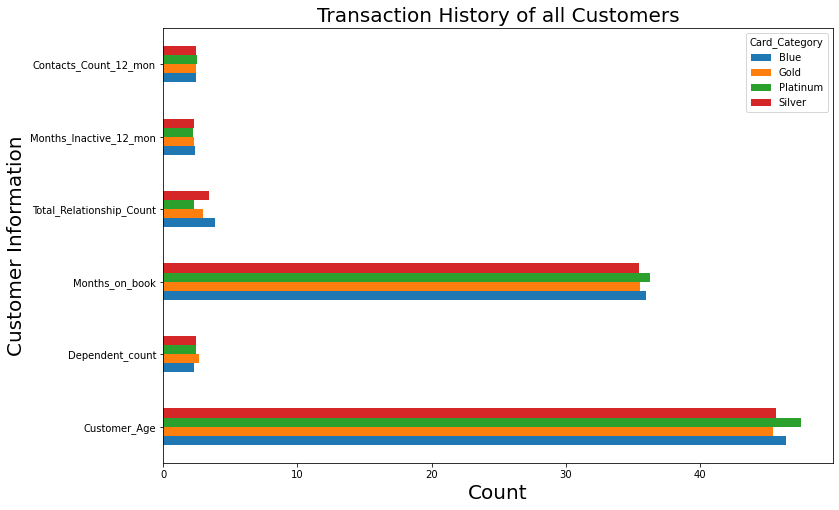

In [15]:
group_by(data, object_col, num_col_2, "Customer Information", "Count")

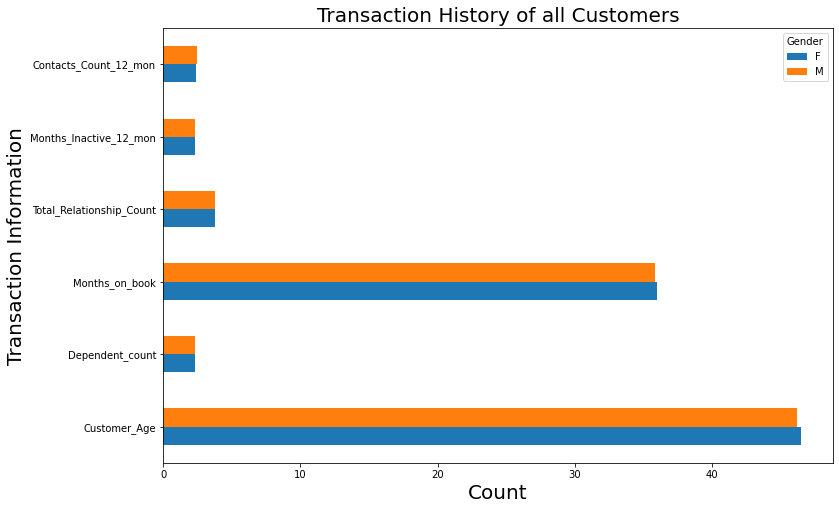

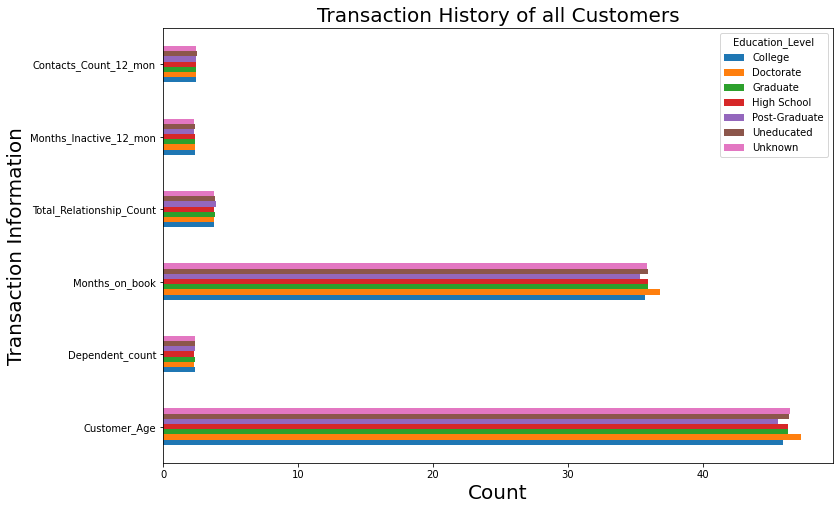

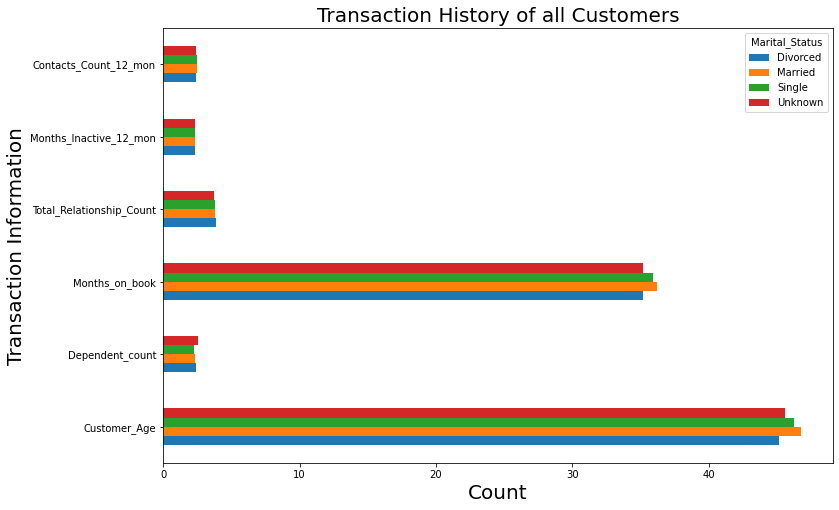

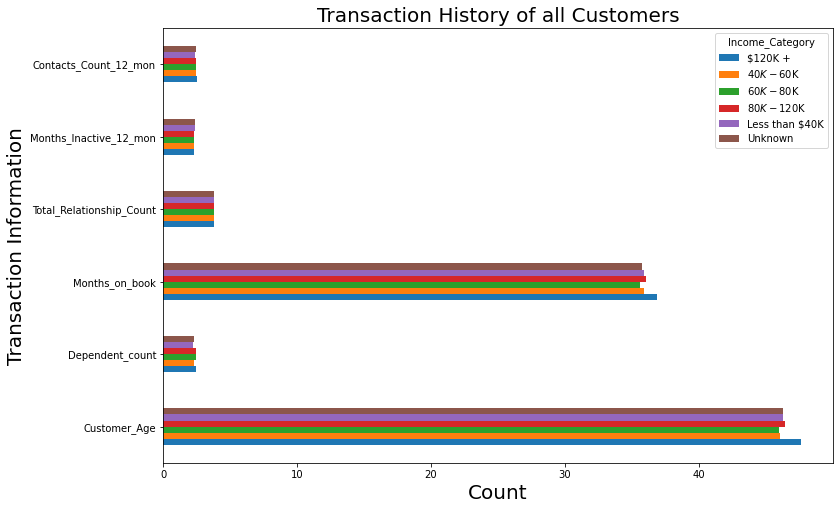

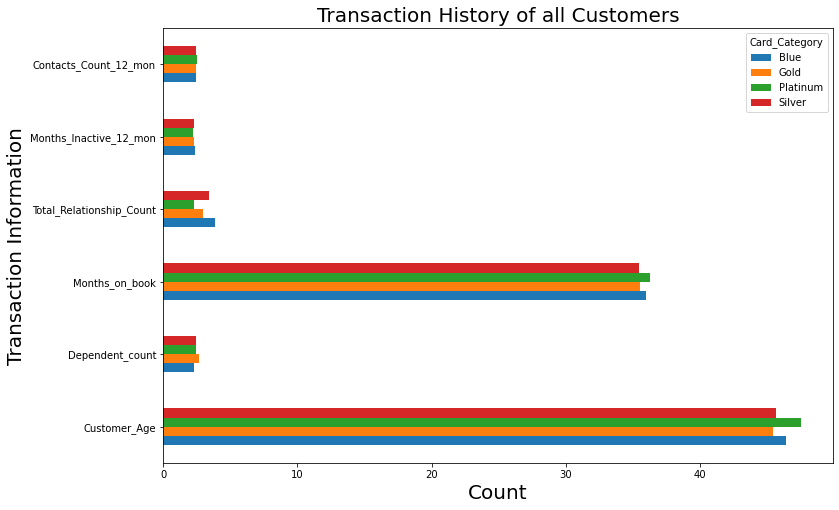

In [16]:
group_by(data, object_col, num_col_2, "Transaction Information", "Count")

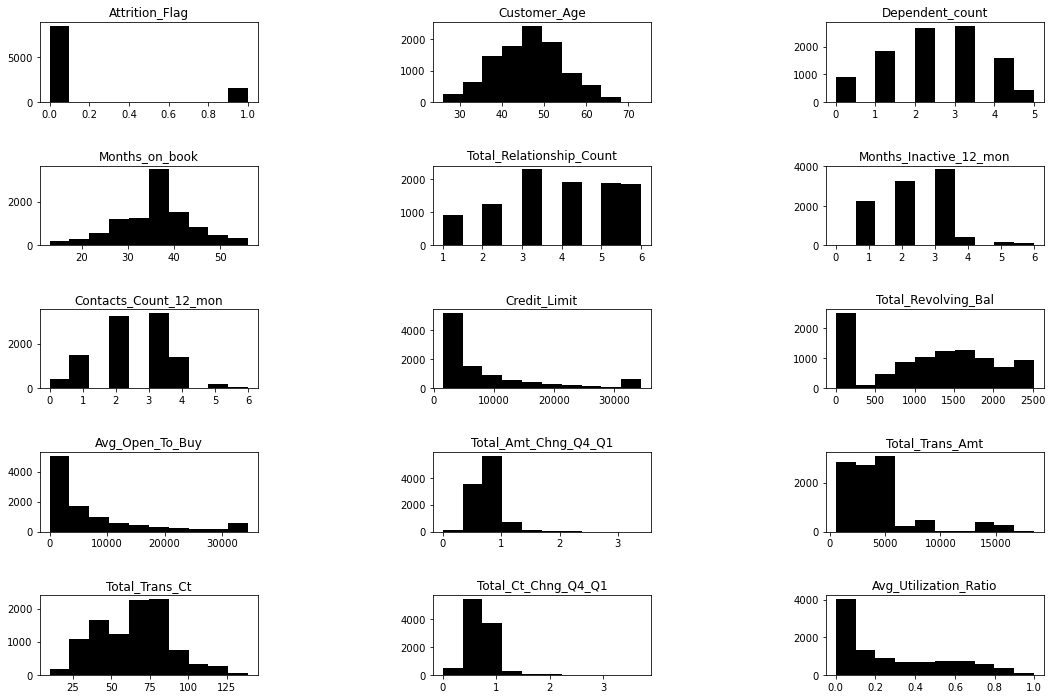

In [17]:
# The relationship between the attrited and existing customer
fig = plt.figure(figsize=(18, 12))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,j in enumerate(number_col):
    ax = fig.add_subplot(5, 3, i+1)
    ax.hist(data[j], color='black')
    ax.set_title(j)

In [18]:
common_relationship = [trends for trends in data.columns]

In [102]:
for trends in common_relationship:
    fig = pl.histogram(data, x= trends, title= 'Distribution of '+trends, color="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})
    fig.show()

In [103]:
# This is an encoding function for logistic regression
def encryption(dataframe, col):
    new = pd.get_dummies(dataframe[[col]])
    result = pd.concat([dataframe, new], axis=1)
    result = result.drop([col], axis=1)
    return result

In [104]:
for trends in object_col:
    data = encryption(data, trends)
    
data.head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               0            45                3              39   
1               0            49                5              44   
2               0            51                3              36   
3               0            40                4              34   
4               0            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 38 columns]